In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
X = pd.read_csv("C:/Users/KIIT/Desktop/Assignment1/linearX.csv")  
y = pd.read_csv("C:/Users/KIIT/Desktop/Assignment1/linearY.csv")  

In [8]:
X = X.values.flatten()
y = y.values.flatten()

In [10]:
print("First 5 values of X:", X[:5])
print("First 5 values of y:", y[:5])

First 5 values of X: [8.  9.1 8.4 6.9 7.7]
First 5 values of y: [0.99007 0.99769 0.99386 0.99508 0.9963 ]


In [12]:
X_mean = np.mean(X)
X_std = np.std(X)
X_norm = (X - X_mean) / X_std

In [14]:
print("First 5 normalized values of X:", X_norm[:5])

First 5 normalized values of X: [-0.02980118  0.60654168  0.20159622 -0.66614404 -0.20334923]


In [16]:
def compute_cost(X, y, theta):
    """Calculate the cost function J(θ)"""
    m = len(y)
    predictions = theta[0] + theta[1] * X
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    """Perform batch gradient descent"""
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        predictions = theta[0] + theta[1] * X
        error = predictions - y

        theta[0] -= learning_rate * (1/m) * np.sum(error)
        theta[1] -= learning_rate * (1/m) * np.sum(error * X)

        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Convergence check (stop if change in cost is very small)
        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < 1e-6:
            print(f"Converged at iteration {i}")
            break

    return theta, cost_history


In [18]:
# Initialize parameters
theta = [0, 0]  # Initial θ0 and θ1

# Train the model
learning_rate = 0.5
num_iterations = 1000  # Set a high value, but it will stop early if it converges
theta_final, cost_history = gradient_descent(X_norm, y, theta, learning_rate, num_iterations)

print("Final θ values:", theta_final)
print("Final Cost:", cost_history[-1])


Converged at iteration 10
Final θ values: [0.996147503649779, 0.0013572767121317125]
Final Cost: 1.3005425226578509e-06


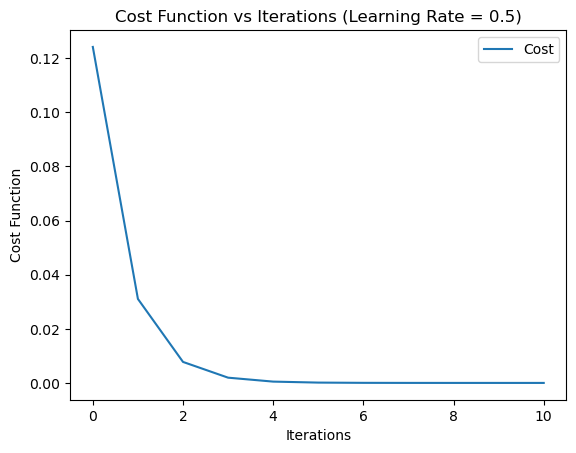

In [20]:
plt.plot(range(len(cost_history)), cost_history, label="Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Iterations (Learning Rate = 0.5)")
plt.legend()
plt.show()


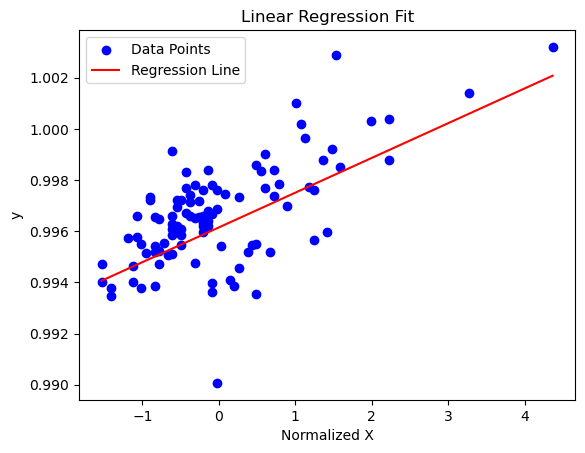

In [22]:
# Plot the dataset
plt.scatter(X_norm, y, color="blue", label="Data Points")

# Plot the regression line
x_line = np.linspace(min(X_norm), max(X_norm), 100)
y_line = theta_final[0] + theta_final[1] * x_line
plt.plot(x_line, y_line, color="red", label="Regression Line")

plt.xlabel("Normalized X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


Converged at iteration 10


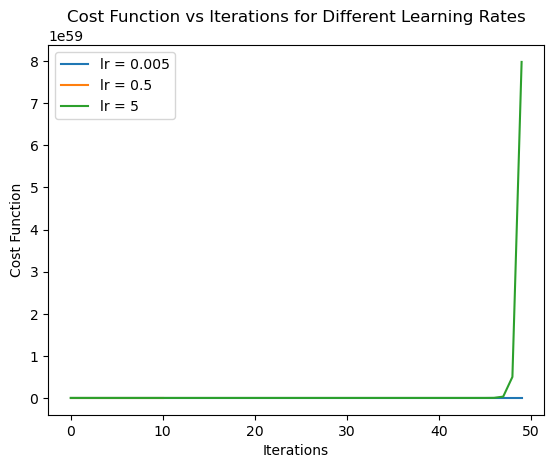

In [24]:
learning_rates = [0.005, 0.5, 5]
for lr in learning_rates:
    theta = [0, 0]  # Reset parameters
    theta_final, cost_history = gradient_descent(X_norm, y, theta, lr, 50)

    plt.plot(range(len(cost_history)), cost_history, label=f"lr = {lr}")

plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Iterations for Different Learning Rates")
plt.legend()
plt.show()


In [26]:
import random

def stochastic_gradient_descent(X, y, theta, learning_rate, num_iterations):
    """Perform Stochastic Gradient Descent (SGD)"""
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Pick a random data point
        index = random.randint(0, m - 1)
        x_i = X[index]
        y_i = y[index]

        # Compute the prediction
        prediction = theta[0] + theta[1] * x_i
        error = prediction - y_i

        # Update parameters
        theta[0] -= learning_rate * error
        theta[1] -= learning_rate * error * x_i

        # Compute cost (for visualization)
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history


In [28]:
def mini_batch_gradient_descent(X, y, theta, learning_rate, num_iterations, batch_size=10):
    """Perform Mini-Batch Gradient Descent"""
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Shuffle the data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]

            # Compute predictions
            predictions = theta[0] + theta[1] * X_batch
            error = predictions - y_batch

            # Update parameters
            theta[0] -= learning_rate * (1/len(X_batch)) * np.sum(error)
            theta[1] -= learning_rate * (1/len(X_batch)) * np.sum(error * X_batch)

        # Compute cost (for visualization)
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history


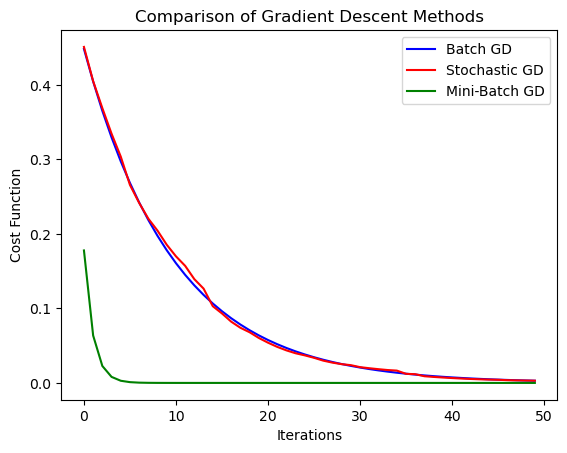

In [30]:
# Set learning rate
learning_rate = 0.05
num_iterations = 50

# Train using Batch Gradient Descent
theta_bgd, cost_bgd = gradient_descent(X_norm, y, [0, 0], learning_rate, num_iterations)

# Train using Stochastic Gradient Descent
theta_sgd, cost_sgd = stochastic_gradient_descent(X_norm, y, [0, 0], learning_rate, num_iterations)

# Train using Mini-Batch Gradient Descent
theta_mbgd, cost_mbgd = mini_batch_gradient_descent(X_norm, y, [0, 0], learning_rate, num_iterations, batch_size=10)

# Plot cost function over iterations
plt.plot(range(len(cost_bgd)), cost_bgd, label="Batch GD", color="blue")
plt.plot(range(len(cost_sgd)), cost_sgd, label="Stochastic GD", color="red")
plt.plot(range(len(cost_mbgd)), cost_mbgd, label="Mini-Batch GD", color="green")

plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Comparison of Gradient Descent Methods")
plt.legend()
plt.show()
